In [ ]:
import numpy as np
import open3d as o3d
from horizon import load, project, camera

## Load terrain

In [2]:
datadir = "../../data/terrain/"
# import pcd file
pc = o3d.io.read_point_cloud(datadir+'brison.xyz') # datadir+"saved_terrain_15x15_extended.pcd"

## Define view point

In [3]:
lat, lon = 44.5451545715, 4.2165341377 # brison
altitude=785
view_point = project.to_xy(lat, lon, altitude)

In [4]:
width = 1280
height = 720
# read camera parameters
parameters = o3d.io.read_pinhole_camera_parameters("../../data/open3d_parameters/ScreenCamera_viewpoint.json")
# change intrinsic and extrinsinc matrices in this file
# for example, the following function compute the focal length in pixels from the camera parameters
camera.get_focal_length_px(4, 1/2.49)

(914.206475584154, 914.2064755841538)

## Retrieve view at given azimuth  

In [5]:
azimuth=221

In [6]:
# set azimuth in extrinsic parameters
parameters.extrinsic = camera.get_extrinsic(azimuth, view_point)

In [7]:
# visualize at wanted azimuth
camera.visualize([pc], parameters)

## Retrieve coordinates from depth map

In [15]:
# load depth previously saved, but can later be done automatically from extrinsic parameters corresponding to a specific azimuth
depths = np.load('../../data/open3d_parameters/test_depth.npy')
param = o3d.io.read_pinhole_camera_parameters('../../data/open3d_parameters/test_parameters.json')

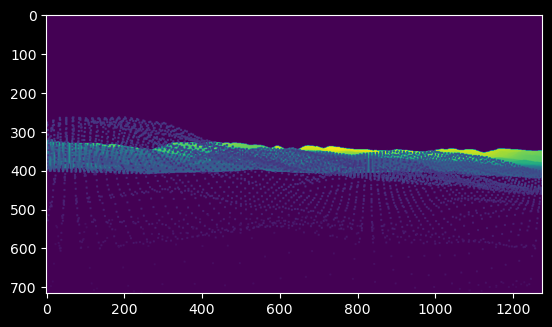

In [16]:
import matplotlib.pyplot as plt
plt.imshow(depths)
plt.show()
# better results with mesh instead of points

In [17]:
u = 280
v = 200
x,y,z = project.unproject(u,v,depths[v,u], param)

In [18]:
project.to_lat_lon(x, y, z)

array([ 44.54513477,   4.21659487, 791.64383084])